In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from time import time
import lightgbm as lgb
import umap


In [2]:
def plot_Umap_data(unknown_data, known_data, info = 'no'):
    # concat the unknow cells and know cells
    test_data =  pd.concat([unknown_data, know_cell])

    # set the Umap, verbose = True to show the process
    reducer = umap.UMAP(verbose=True)
    
    # fit the Umap and record the time
    t0 = time()
    print('start Umap fitting')
    embedding = reducer.fit_transform(test_data.drop(['batch', 'celltype'],axis=1))
    print('It takes ', time()-t0, '  seconds')
    print(embedding.shape)

    # get the (x,y)
    test_data['X'] = embedding[:, 0]
    test_data['Y'] = embedding[:, 1]
    fig = plt.figure(1, figsize=(22, 12))

    Label_Com = cell_label_list
    
    # plot the umap result 
    for index in range(19):
        X = test_data.loc[test_data['celltype'] == Label_Com[index]]['X']
        Y = test_data.loc[test_data['celltype'] == Label_Com[index]]['Y']
        
        if index!=18:
            plt.scatter(X, Y, marker='8', s=10,alpha=0.2,linewidth=0)  
        else:
            plt.scatter(X, Y,c ='yellow', marker='8',alpha=0.2, s=10,linewidth=0)  

    # add legend and title 
    ax = fig.gca()
    
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels = Label_Com, loc='best', prop={'size':10})

    plt.title('Batch %s'%list(unknow_cell[1:2]['batch'])[0])
    
    # save the fig
    plt.savefig('./figure/all_cell_batch %s.png'%list(know_cell[1:2]['batch'])[0])
    plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
cell_label_info = pd.read_table('./data/cell_label.txt')
data_now = pd.read_csv('./processd_data.csv')


In [6]:
cell_label_list = cell_label_info.columns.tolist()
cell_label_list.append('unknown_cell')

In [7]:
data_now.head(5)

,CD235ab,MCEMP1,ICOS,CD96,LCK,CXCR6,CD2,HAPTOGLOBIN,FLT3,STAT4,...,CD14,CD16,CD27,CD45RA,CD3,CD38,HLA.DR,batch,celltype,celltype_number
0,0.266458,0.843588,0.000000,0.566443,0.578018,0.426957,2.147042,0.608361,0.550156,1.029276,...,0.818624,0.0,1.888936,1.527312,2.728251,0.872396,0.000000,c01_IPFH,unknown_cell,18
1,0.890183,1.039873,0.977795,0.769440,0.245717,0.198752,1.953850,0.000000,0.000000,0.904484,...,0.116559,0.0,1.547359,0.000000,2.776900,0.774546,0.000000,c01_IPFH,unknown_cell,18
2,1.032193,1.408455,1.351160,1.229337,0.476334,0.750055,1.939668,0.662886,0.915624,1.056118,...,1.245918,0.0,0.190691,1.503655,2.802467,0.000000,2.287302,c01_IPFH,Effector T helper cells,11
3,0.722698,1.851187,0.671645,0.877242,0.000000,0.000000,0.000000,0.779155,0.374503,0.806161,...,1.052678,0.0,0.000000,1.291378,1.121688,1.132275,1.631254,c01_IPFH,unknown_cell,18
4,1.126662,1.804310,0.863143,0.495244,0.727941,0.000000,0.000000,0.755254,0.501104,0.756800,...,1.046785,0.0,0.000000,0.000000,0.000000,0.325935,2.194841,c01_IPFH,unknown_cell,18


In [18]:
batch_list = list(set(data_now['batch']))

unknow cells: 72232
know cells: 5752
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 11:54:26 2019 Finding Nearest Neighbors
Fri Jul 26 11:54:26 2019 Building RP forest with 19 trees
Fri Jul 26 11:54:35 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Fri Jul 26 11:55:03 2019 Finished Nearest Neighbor Search
Fri Jul 26 11:55:14 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	comple

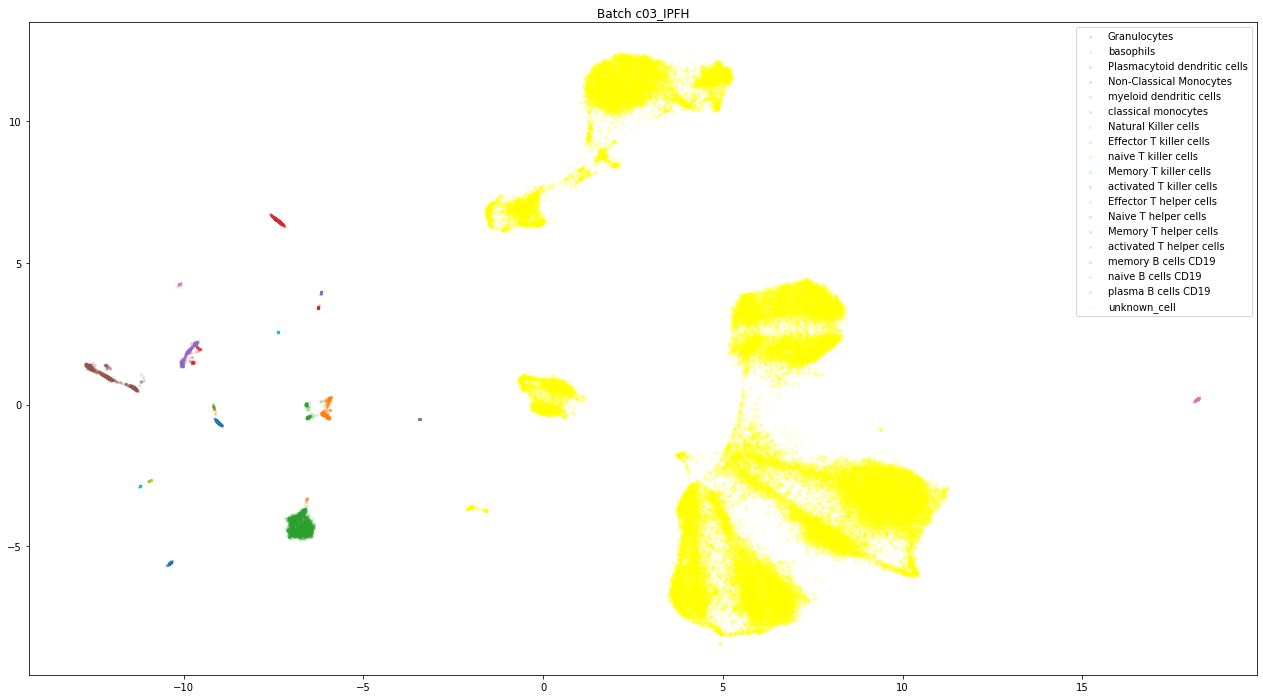

unknow cells: 70918
know cells: 5312
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 11:58:58 2019 Finding Nearest Neighbors
Fri Jul 26 11:58:58 2019 Building RP forest with 19 trees
Fri Jul 26 11:59:06 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Fri Jul 26 11:59:30 2019 Finished Nearest Neighbor Search
Fri Jul 26 11:59:36 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

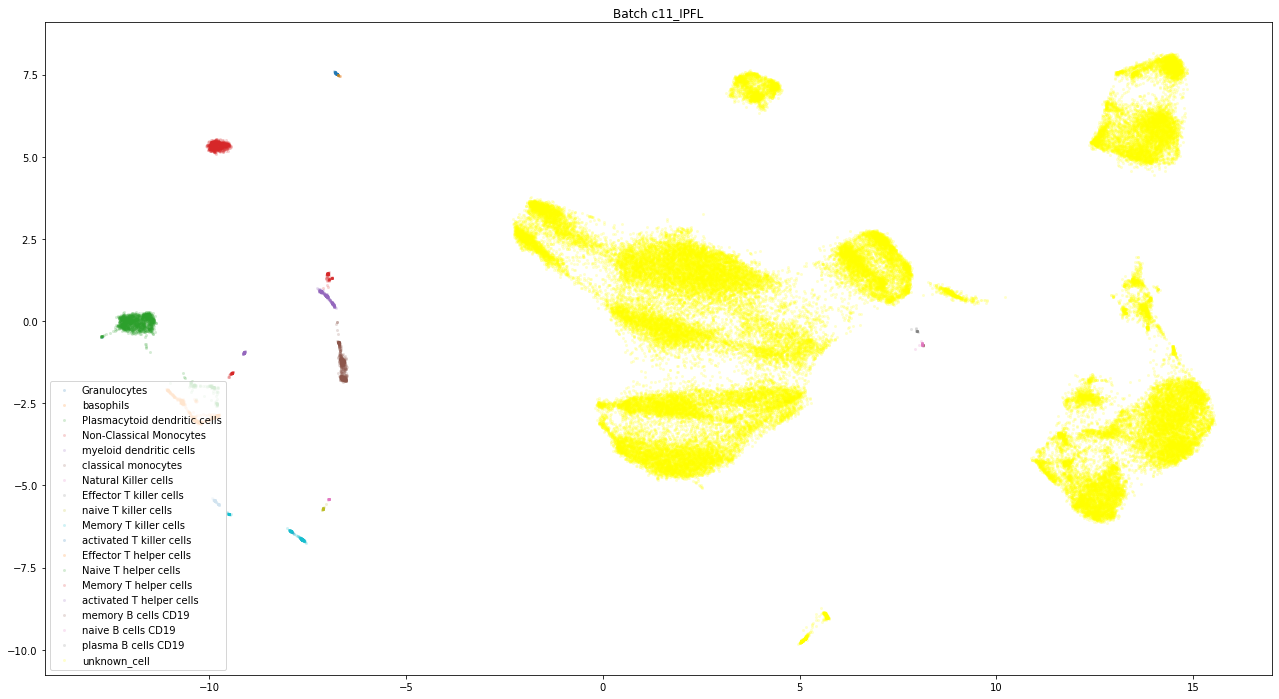

unknow cells: 7931
know cells: 554
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:03:16 2019 Finding Nearest Neighbors
Fri Jul 26 12:03:16 2019 Building RP forest with 10 trees
Fri Jul 26 12:03:17 2019 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
Fri Jul 26 12:03:19 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:03:20 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  / 

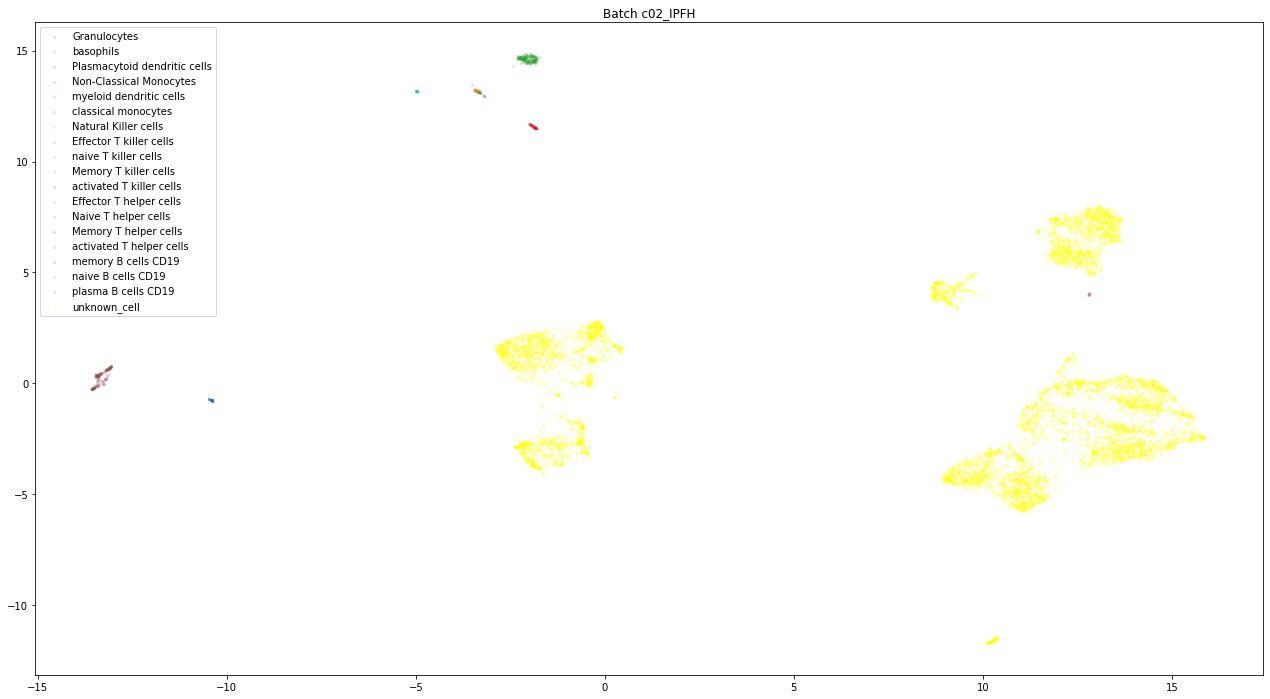

unknow cells: 45069
know cells: 2979
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:04:04 2019 Finding Nearest Neighbors
Fri Jul 26 12:04:04 2019 Building RP forest with 16 trees
Fri Jul 26 12:04:08 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Fri Jul 26 12:04:24 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:04:28 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	comple

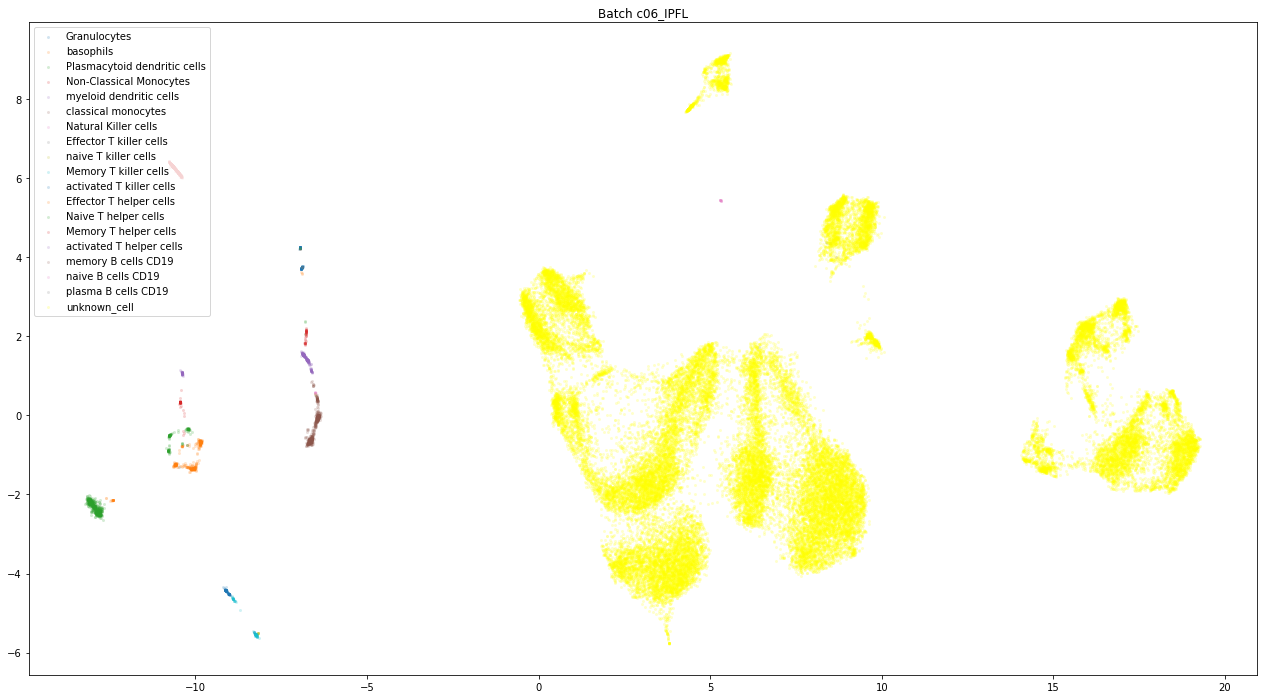

unknow cells: 8231
know cells: 1691
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:06:44 2019 Finding Nearest Neighbors
Fri Jul 26 12:06:44 2019 Building RP forest with 10 trees
Fri Jul 26 12:06:44 2019 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
Fri Jul 26 12:06:49 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:06:50 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /

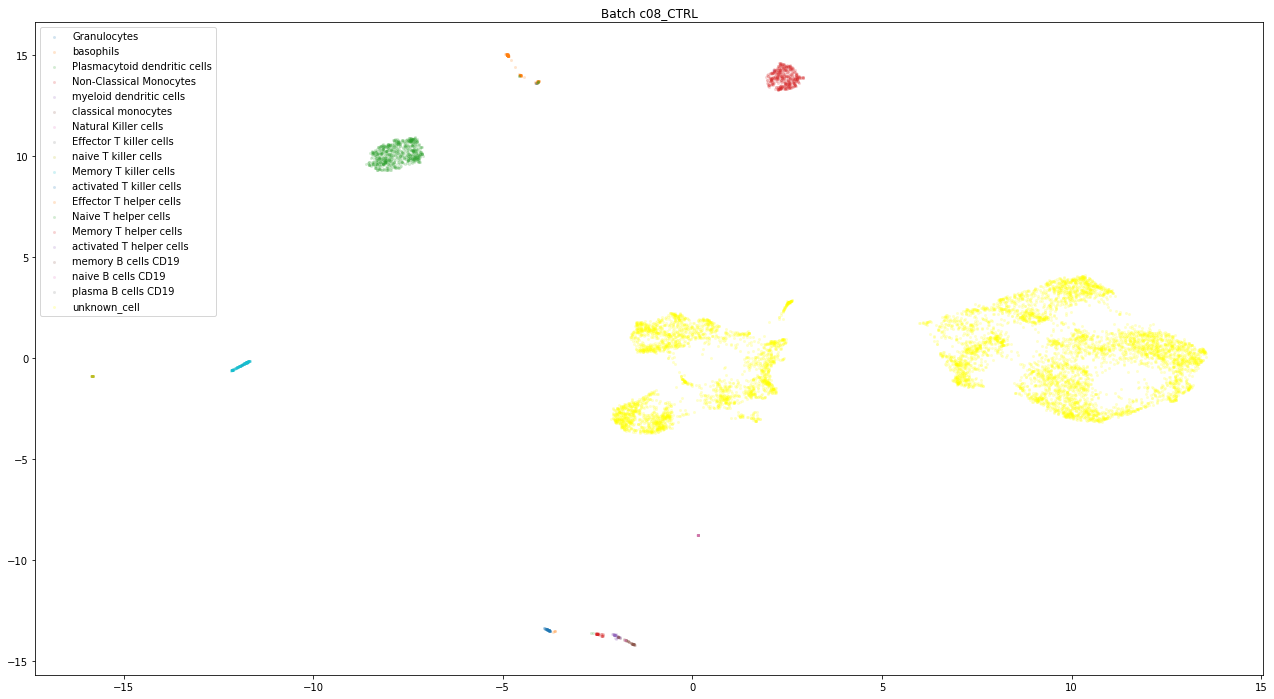

unknow cells: 38323
know cells: 3951
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:07:46 2019 Finding Nearest Neighbors
Fri Jul 26 12:07:46 2019 Building RP forest with 15 trees
Fri Jul 26 12:07:49 2019 NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
Fri Jul 26 12:08:03 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:08:07 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	comple

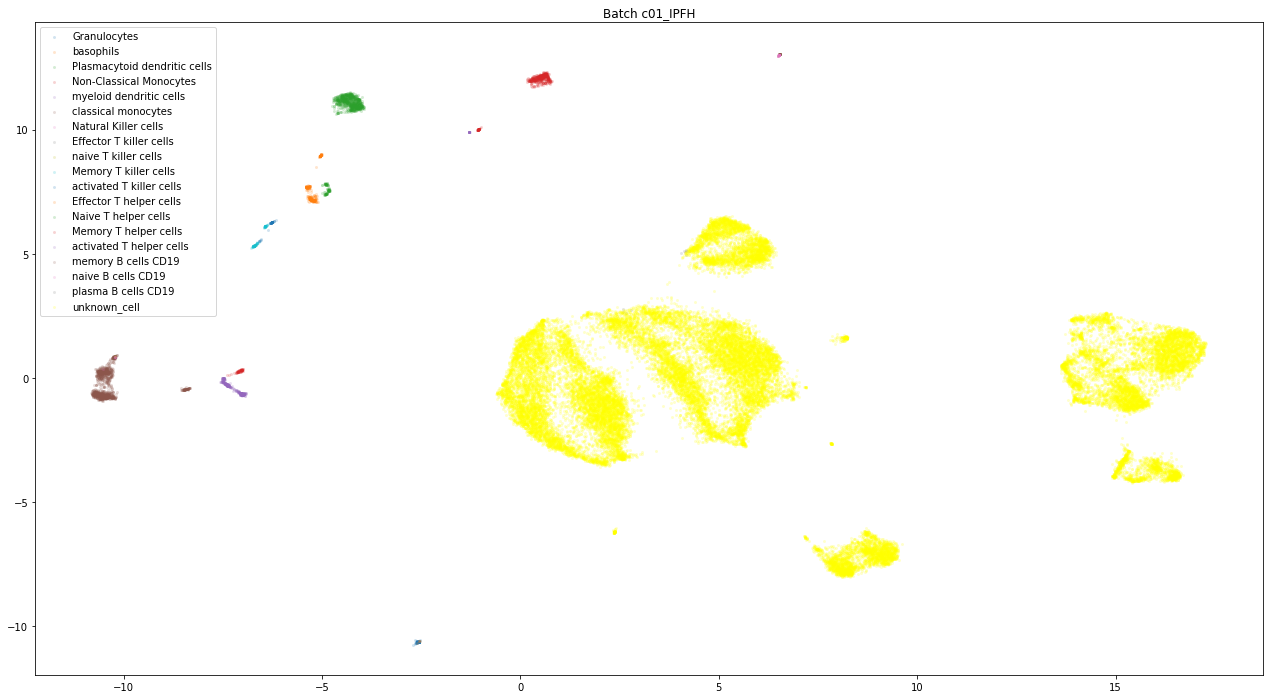

unknow cells: 57349
know cells: 5290
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:10:00 2019 Finding Nearest Neighbors
Fri Jul 26 12:10:00 2019 Building RP forest with 18 trees
Fri Jul 26 12:10:06 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Fri Jul 26 12:10:26 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:10:31 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

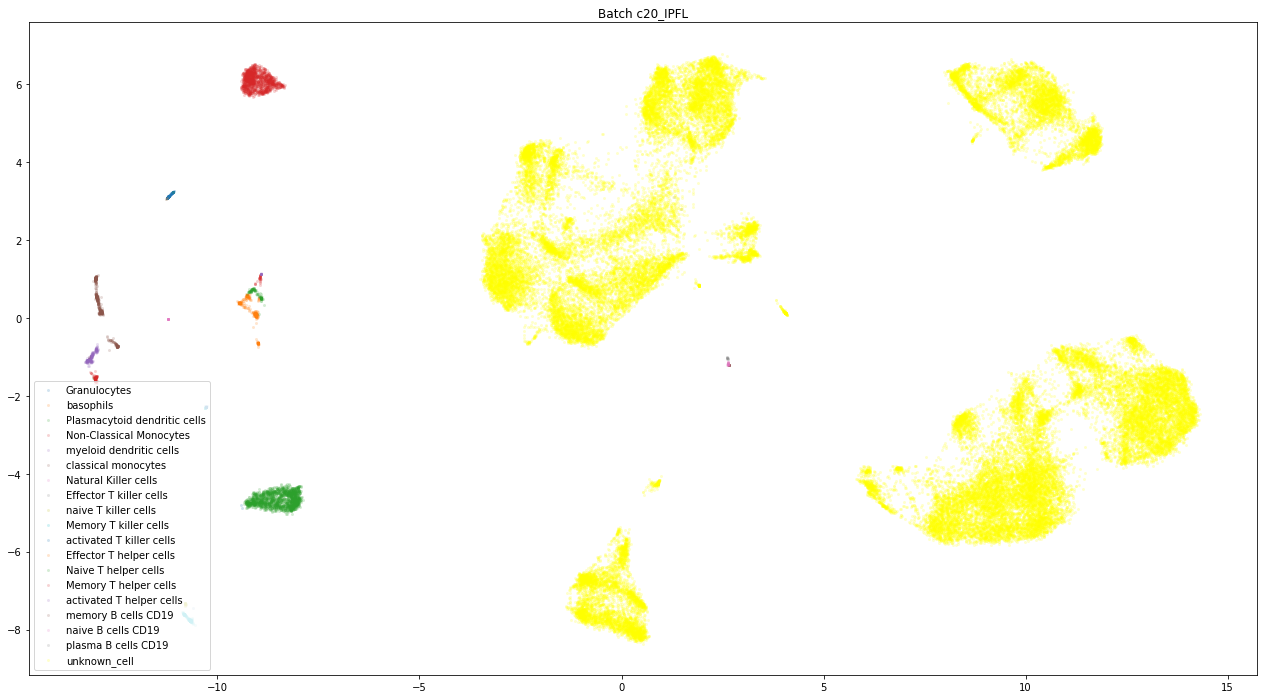

unknow cells: 54372
know cells: 2718
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:13:36 2019 Finding Nearest Neighbors
Fri Jul 26 12:13:36 2019 Building RP forest with 17 trees
Fri Jul 26 12:13:41 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Fri Jul 26 12:13:59 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:14:04 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

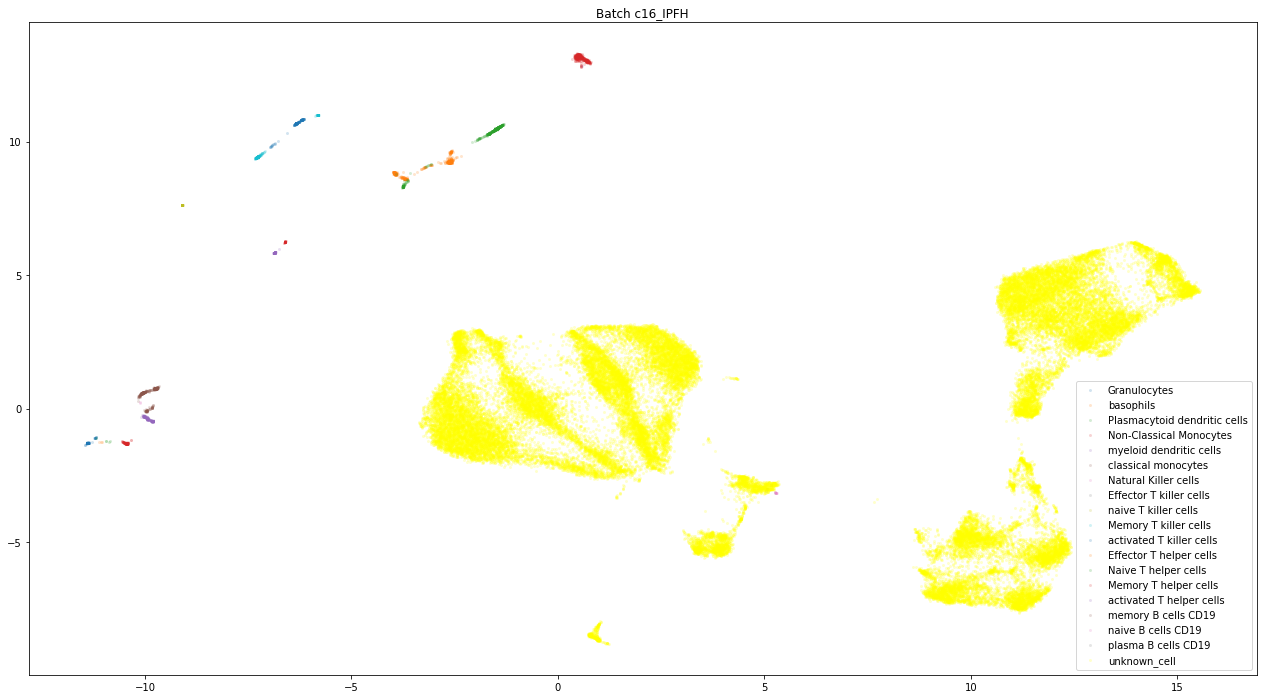

unknow cells: 15778
know cells: 1707
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:16:12 2019 Finding Nearest Neighbors
Fri Jul 26 12:16:12 2019 Building RP forest with 12 trees
Fri Jul 26 12:16:12 2019 NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
Fri Jul 26 12:16:17 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:16:18 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

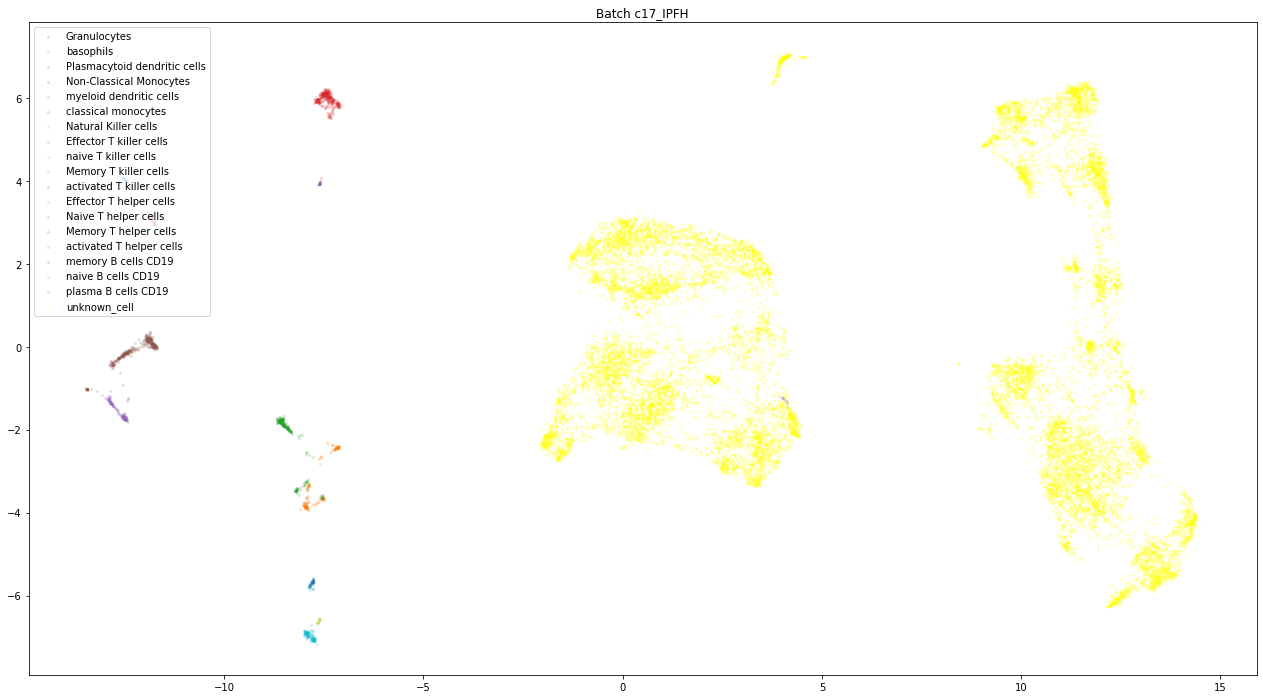

unknow cells: 44465
know cells: 6844
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:16:49 2019 Finding Nearest Neighbors
Fri Jul 26 12:16:49 2019 Building RP forest with 16 trees
Fri Jul 26 12:16:52 2019 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Fri Jul 26 12:17:04 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:17:07 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

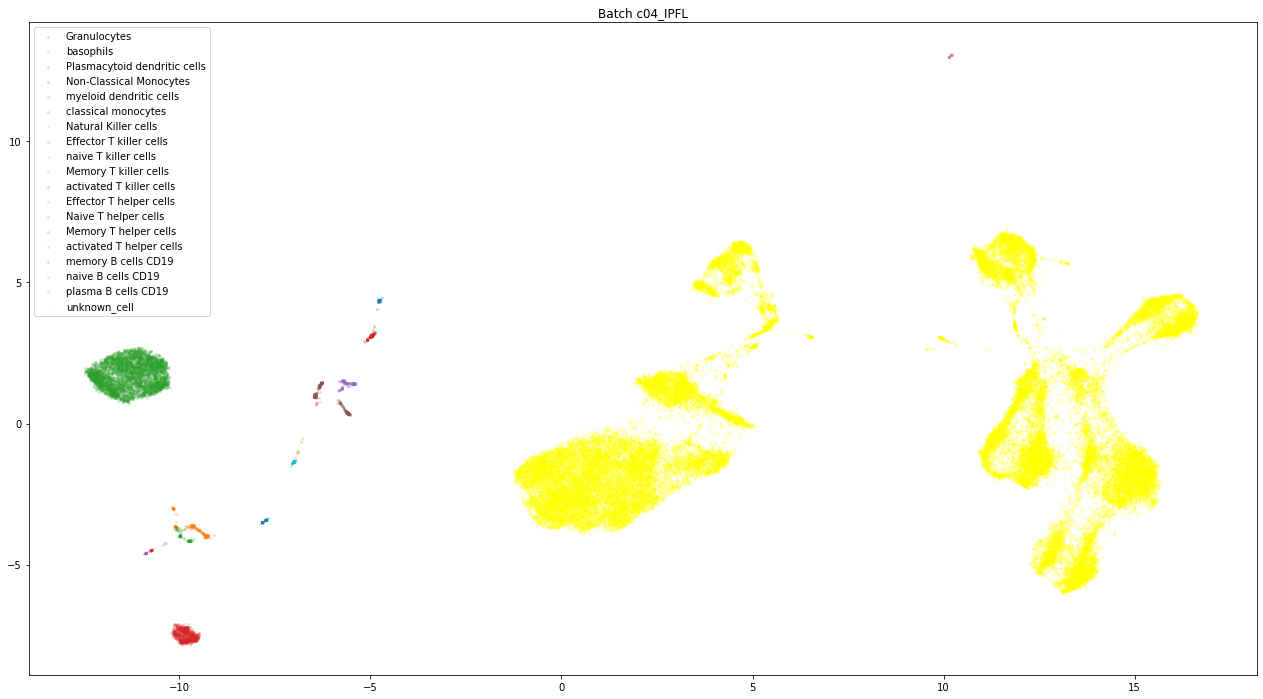

unknow cells: 93599
know cells: 5569
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:19:09 2019 Finding Nearest Neighbors
Fri Jul 26 12:19:09 2019 Building RP forest with 21 trees
Fri Jul 26 12:19:20 2019 NN descent for 17 iterations
	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
Fri Jul 26 12:19:50 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:19:58 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  / 

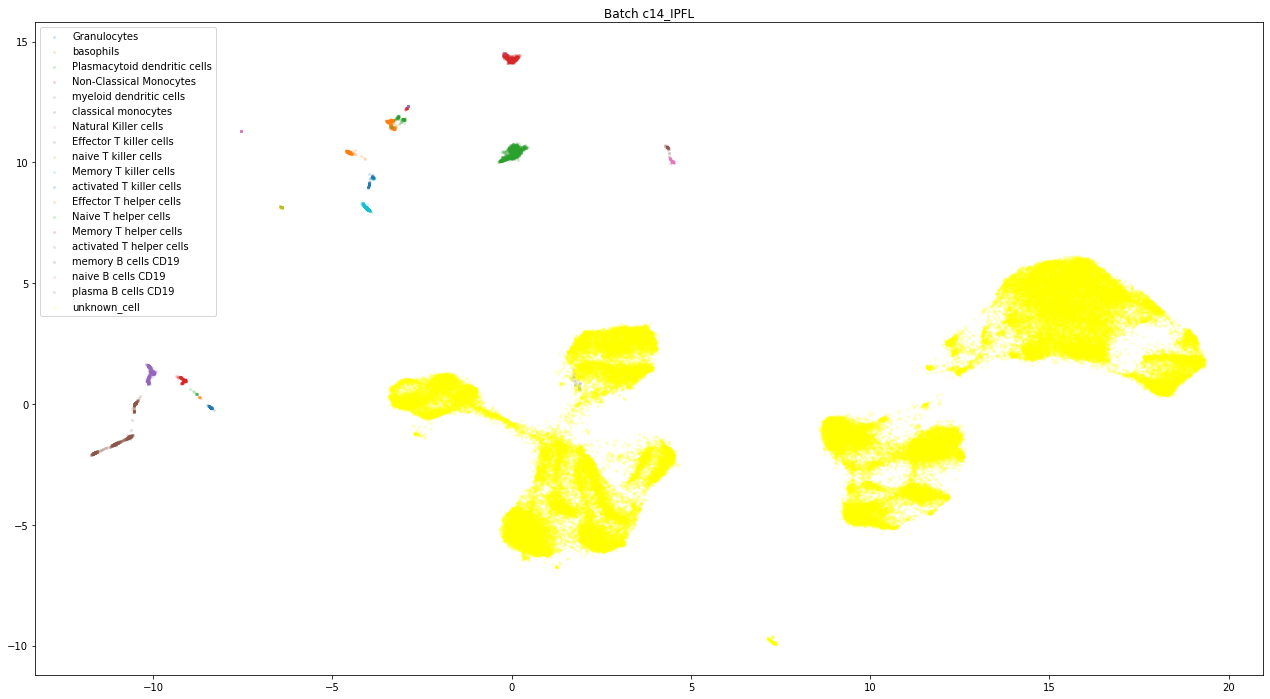

unknow cells: 0
know cells: 1510
start Umap fitting
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jul 26 12:25:03 2019 Finding Nearest Neighbors
Fri Jul 26 12:25:03 2019 Finished Nearest Neighbor Search
Fri Jul 26 12:25:07 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  50

IndexError: list index out of range

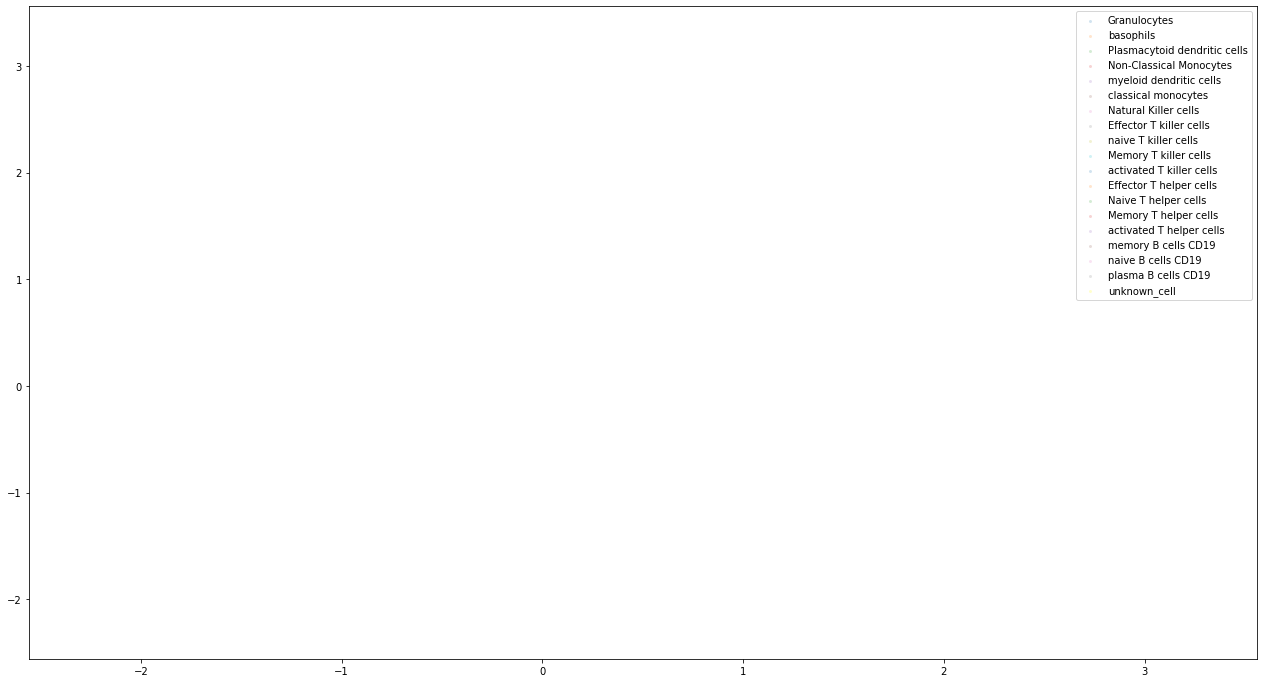

In [21]:
# plot the Umap result in different batch
for batch_info in batch_list:
    unknow_cell = data_now[data.columns].loc[(data_now['celltype'] == 'unknown_cell') & (data_now['batch'] == batch_info)]
    know_cell = data_now[data.columns].loc[(data_now['celltype'] != 'unknown_cell') & (data_now['batch'] == batch_info)]
    print('unknow cells:', unknow_cell.shape[0])
    print('know cells:', know_cell.shape[0])
    plot_Umap_data(unknow_cell, know_cell)